# Exploración de Datos (EDA)

Este notebook realiza un análisis exploratorio del dataset de readmisión hospitalaria. Puedes correrlo en Google Colab o localmente.

In [3]:
# 📌 Montar Google Drive si estás en Colab
import os
IN_COLAB = 'google.colab' in str(get_ipython())
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    BASE_PATH = '/content/drive/MyDrive/Hospital_Readmission'
else:
    BASE_PATH = '.'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Define BASE_PATH como el directorio actual
os.chdir(BASE_PATH)
print(f"Directorio actual: {os.getcwd()}")

Directorio actual: /content/drive/MyDrive/Hospital_Readmission


In [10]:
# 📊 Cargar datos
import pandas as pd
#data_path = os.path.join(BASE_PATH, 'data/hospital_readmission_light.csv')
data_path = os.path.join(BASE_PATH, './data/diabetic_data.csv')
df = pd.read_csv(data_path)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Estadísticas generales

In [11]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11105 entries, 0 to 11104
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              11105 non-null  int64 
 1   patient_nbr               11105 non-null  int64 
 2   race                      11105 non-null  object
 3   gender                    11105 non-null  object
 4   age                       11105 non-null  object
 5   weight                    11105 non-null  object
 6   admission_type_id         11105 non-null  int64 
 7   discharge_disposition_id  11105 non-null  int64 
 8   admission_source_id       11105 non-null  int64 
 9   time_in_hospital          11105 non-null  int64 
 10  payer_code                11105 non-null  object
 11  medical_specialty         11105 non-null  object
 12  num_lab_procedures        11105 non-null  int64 
 13  num_procedures            11105 non-null  int64 
 14  num_medications       

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.110500e+04,1.110500e+04,11105,11105,11105,11105,11105.000000,11105.000000,11105.000000,11105.000000,...,11104,11104,11104,11104,11104,11104,11104,11104,11104,11104
unique,NaN,NaN,6,2,10,10,NaN,NaN,NaN,NaN,...,1,4,2,1,1,1,1,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,8065,5939,2949,10787,NaN,NaN,NaN,NaN,...,11104,6009,11099,11104,11104,11104,11104,6899,8187,5655
mean,2.723027e+07,2.509420e+07,NaN,NaN,NaN,NaN,2.424764,4.940928,6.692841,4.714633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.252758e+07,3.287245e+07,NaN,NaN,NaN,NaN,1.827567,6.810390,5.004980,3.149903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.773403e+07,2.330955e+06,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.866913e+07,8.589357e+06,NaN,NaN,NaN,NaN,2.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.785687e+07,2.588544e+07,NaN,NaN,NaN,NaN,3.000000,6.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribución de la variable objetivo (`readmitted`)

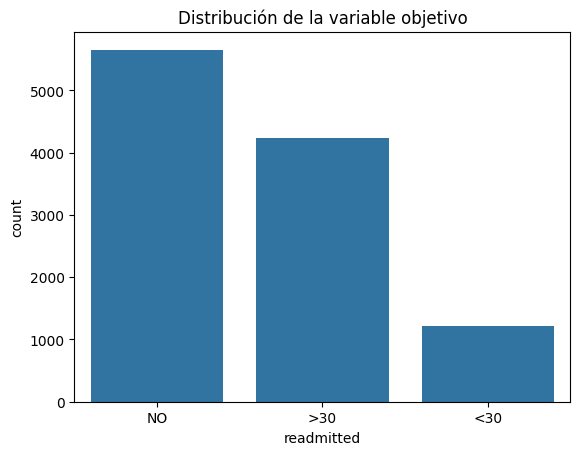

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='readmitted', data=df)
plt.title('Distribución de la variable objetivo')
plt.show()

## Variables categóricas y numéricas (histogramas)

In [13]:
# Renombrar las columnas para que sean más descriptivas y en castellano
df.rename(columns={
    'race': 'Raza',
    'gender': 'Sexo',
    'age': 'Edad',
    'time_in_hospital': 'Tiempo_en_hospital',
    'num_lab_procedures': 'Num_procedimientos_lab',
    'num_procedures': 'Num_procedimientos',
    'num_medications': 'Num_medicamentos',
    'number_outpatient': 'Num_visitas_ambulatorias',
    'number_emergency': 'Num_visitas_urgencias',
    'number_inpatient': 'Num_hospitalizaciones',
    'diag_1': 'Diagnostico_1',
    'diag_2': 'Diagnostico_2',
    'diag_3': 'Diagnostico_3',
    'number_diagnoses': 'Num_diagnosticos',
    'readmitted': 'Readmitido'
}, inplace=True)
# Verificar los cambios
df.head()

,encounter_id,patient_nbr,Raza,Sexo,Edad,weight,admission_type_id,discharge_disposition_id,admission_source_id,Tiempo_en_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,Readmitido
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


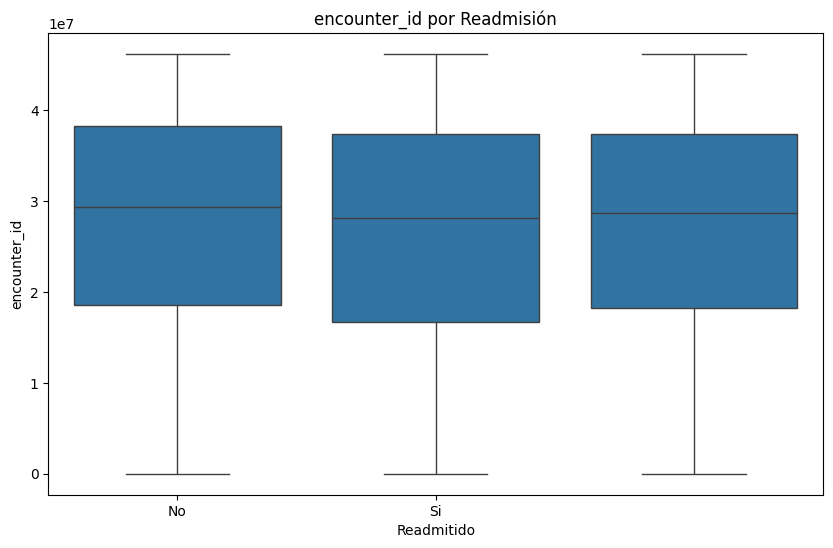

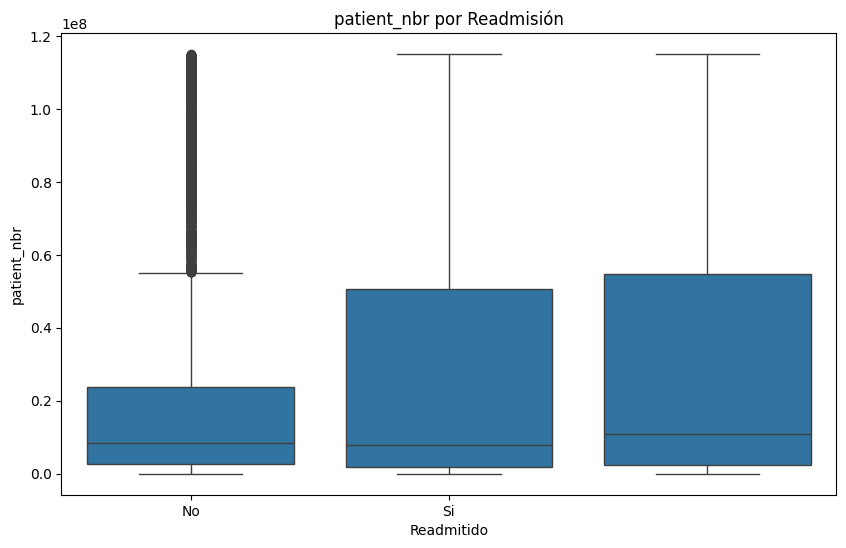

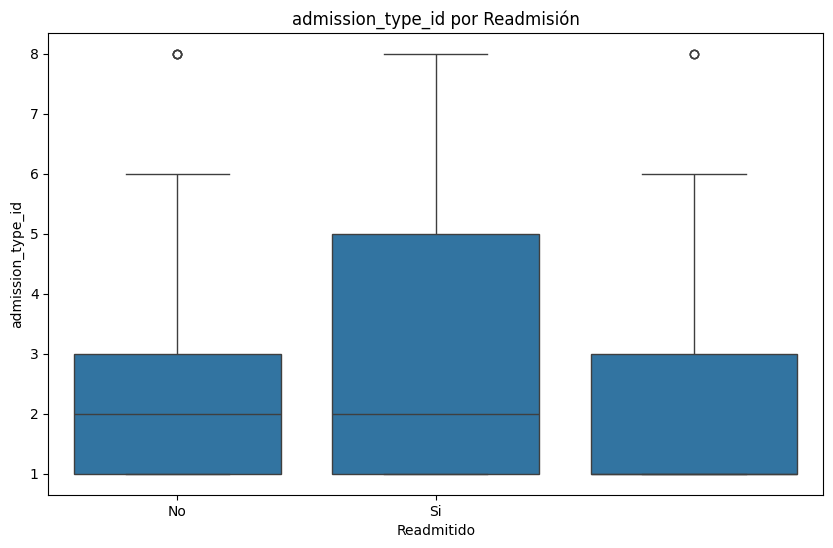

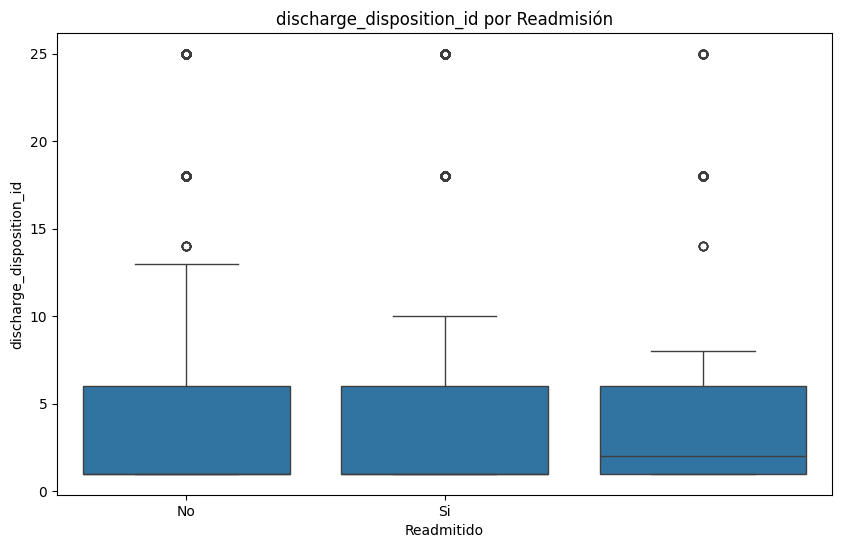

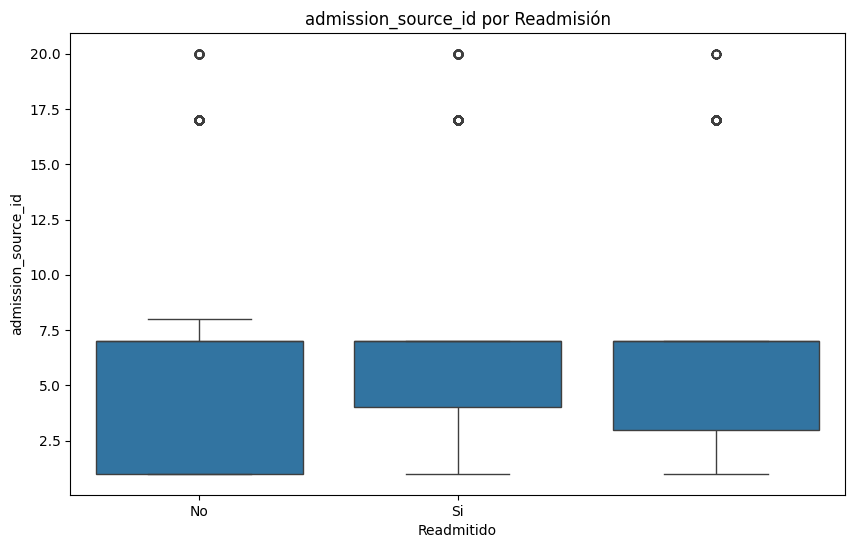

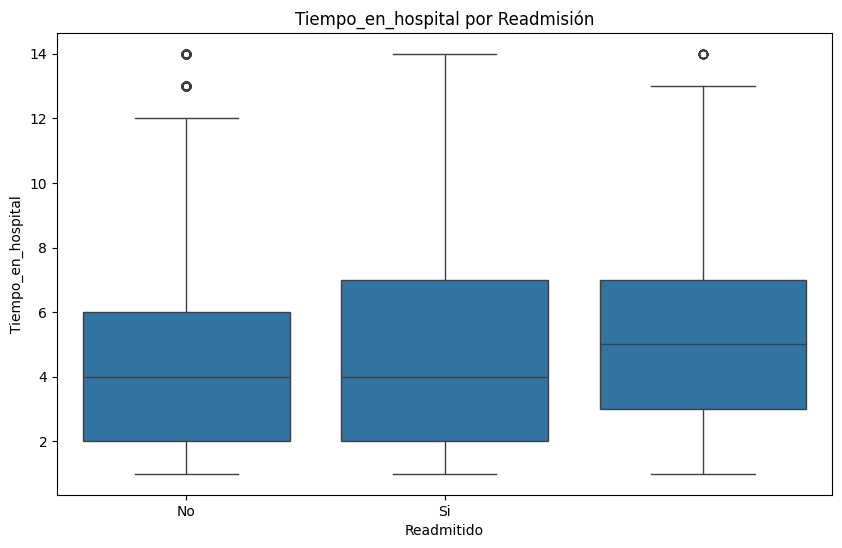

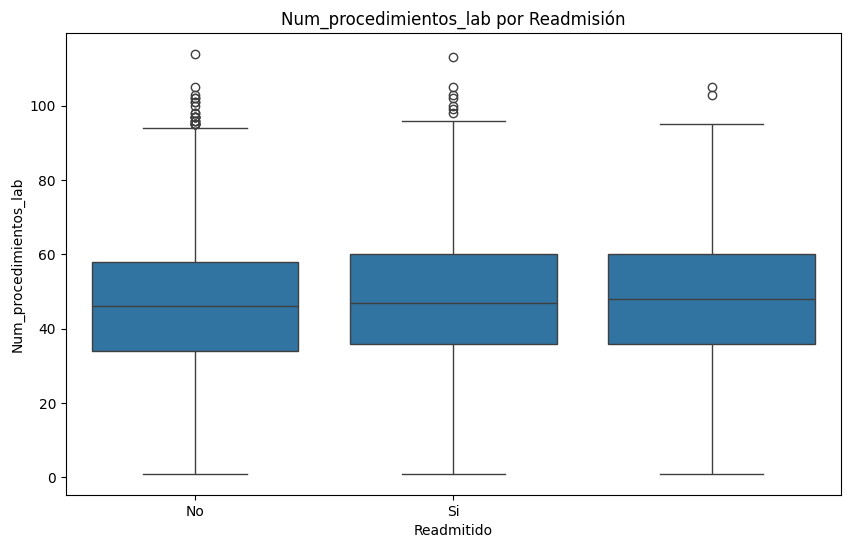

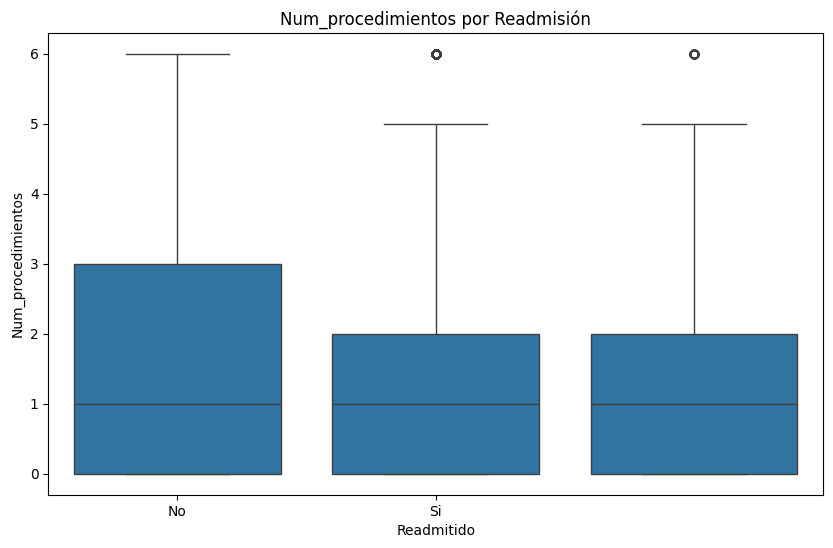

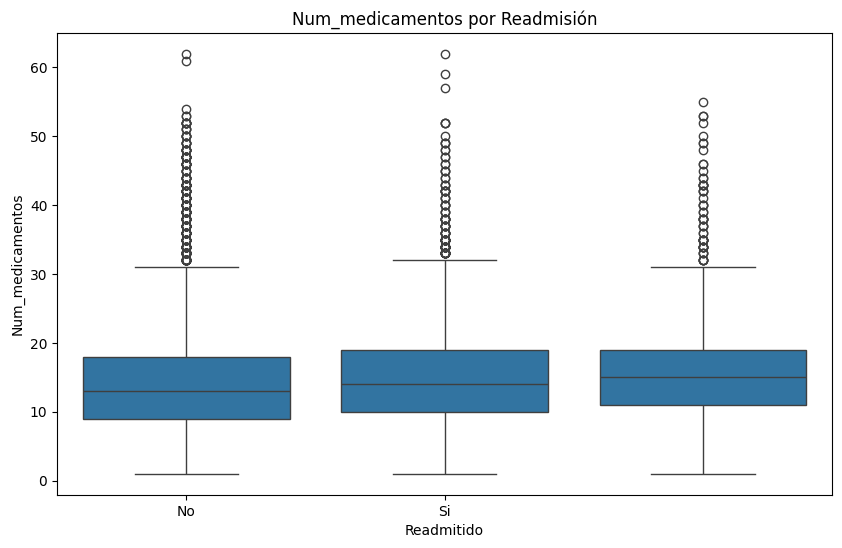

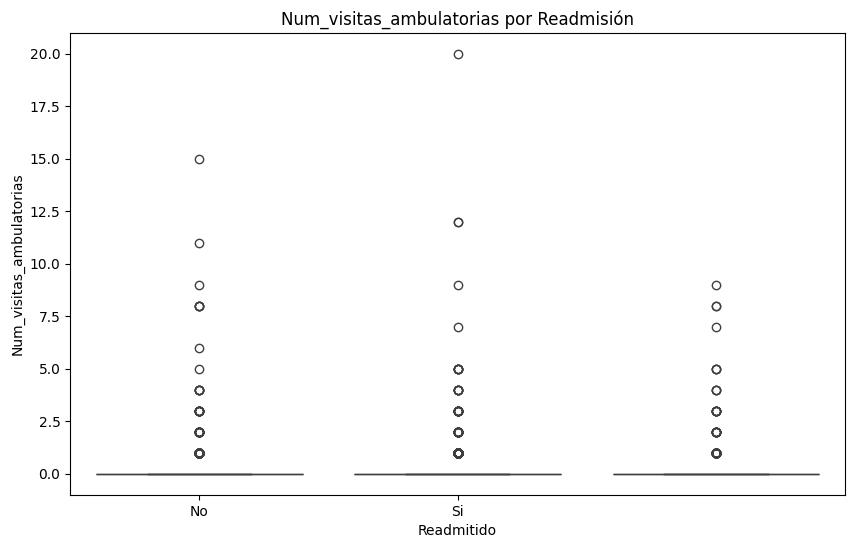

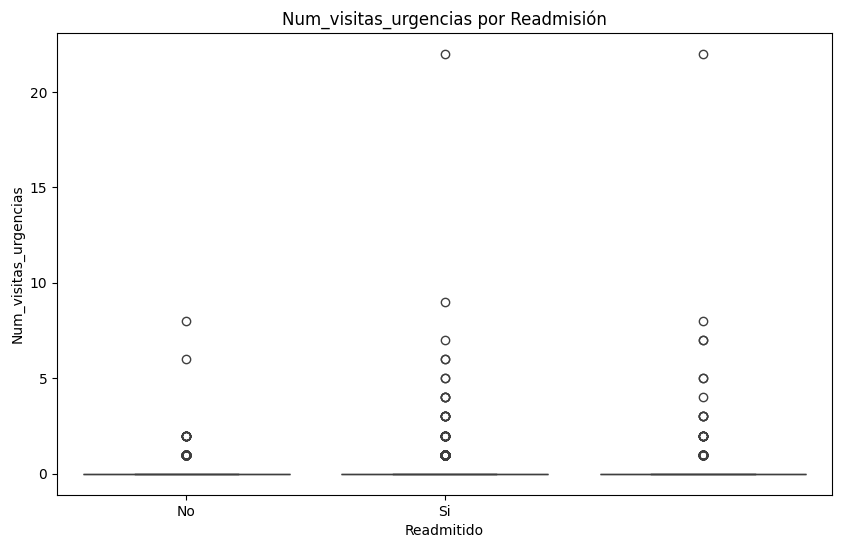

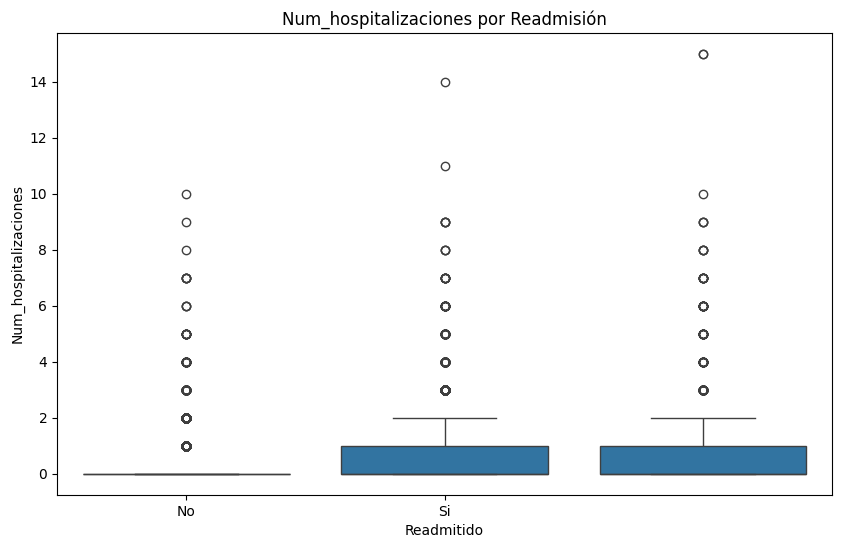

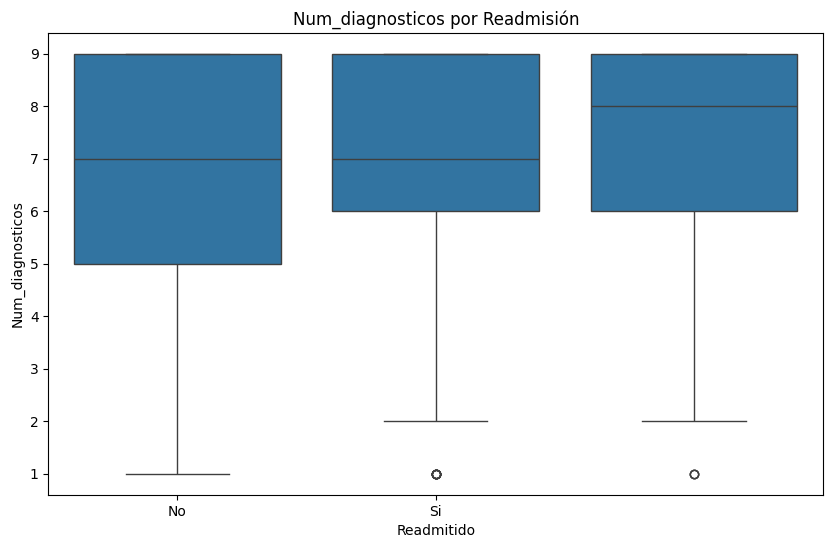

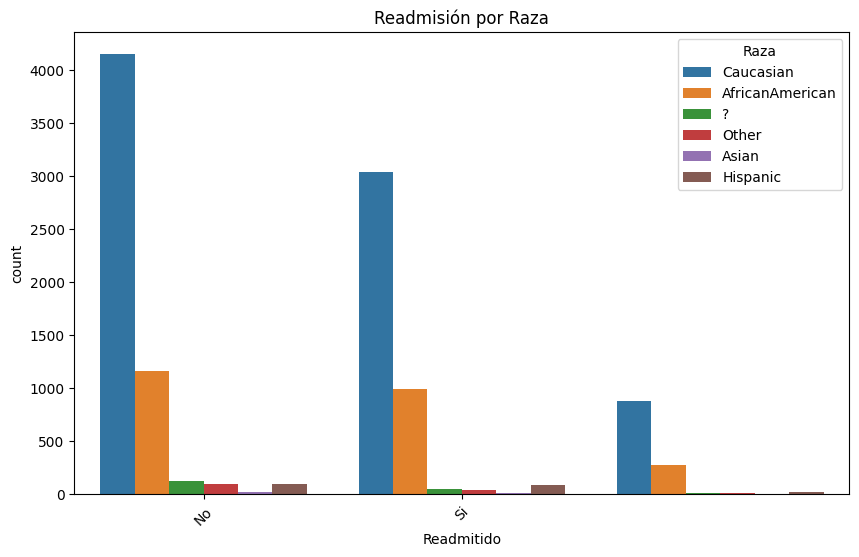

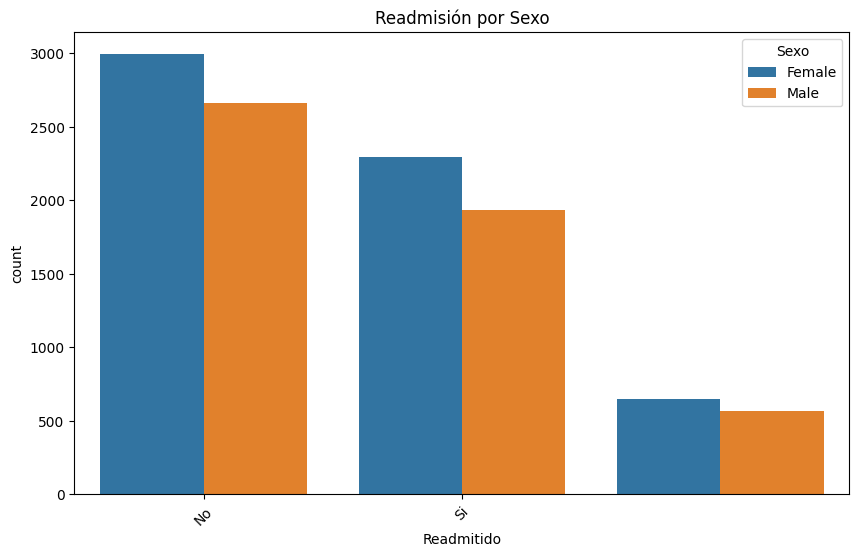

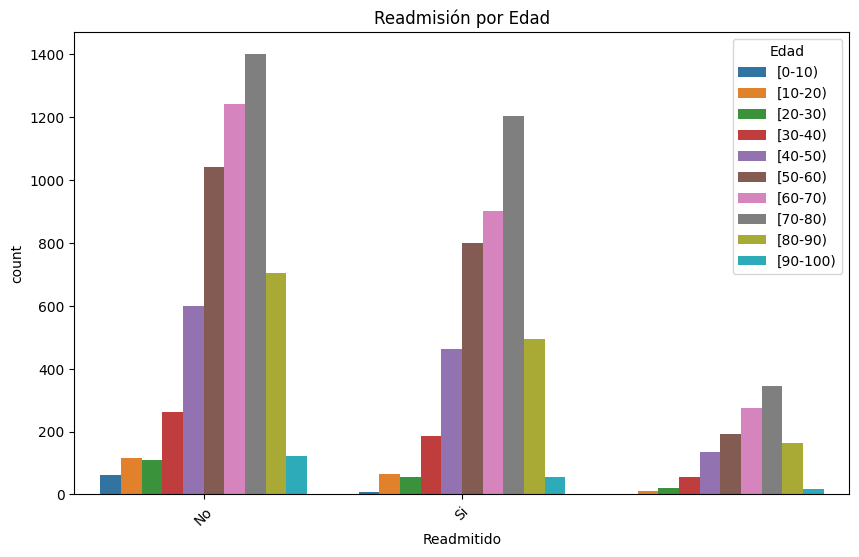

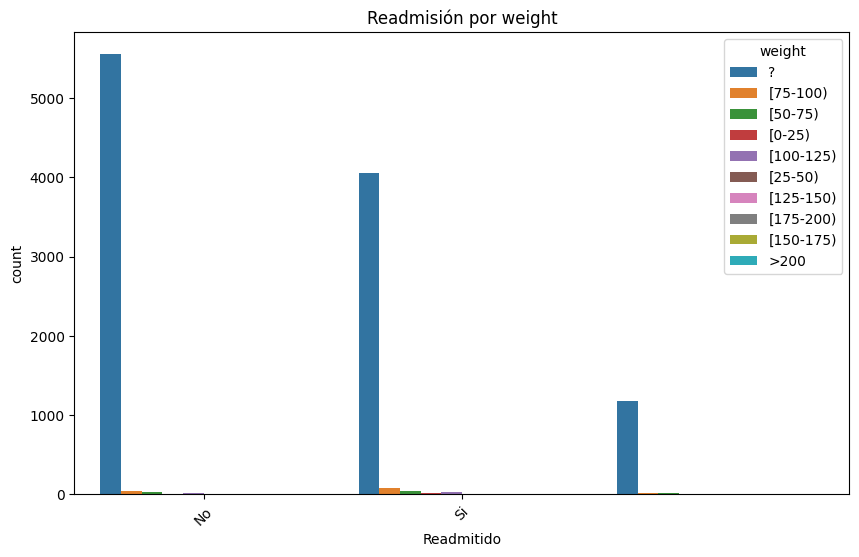

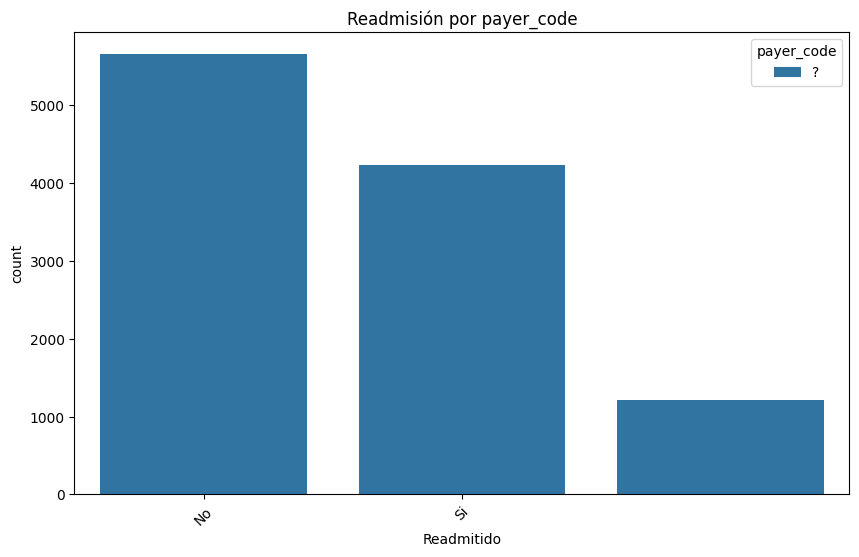

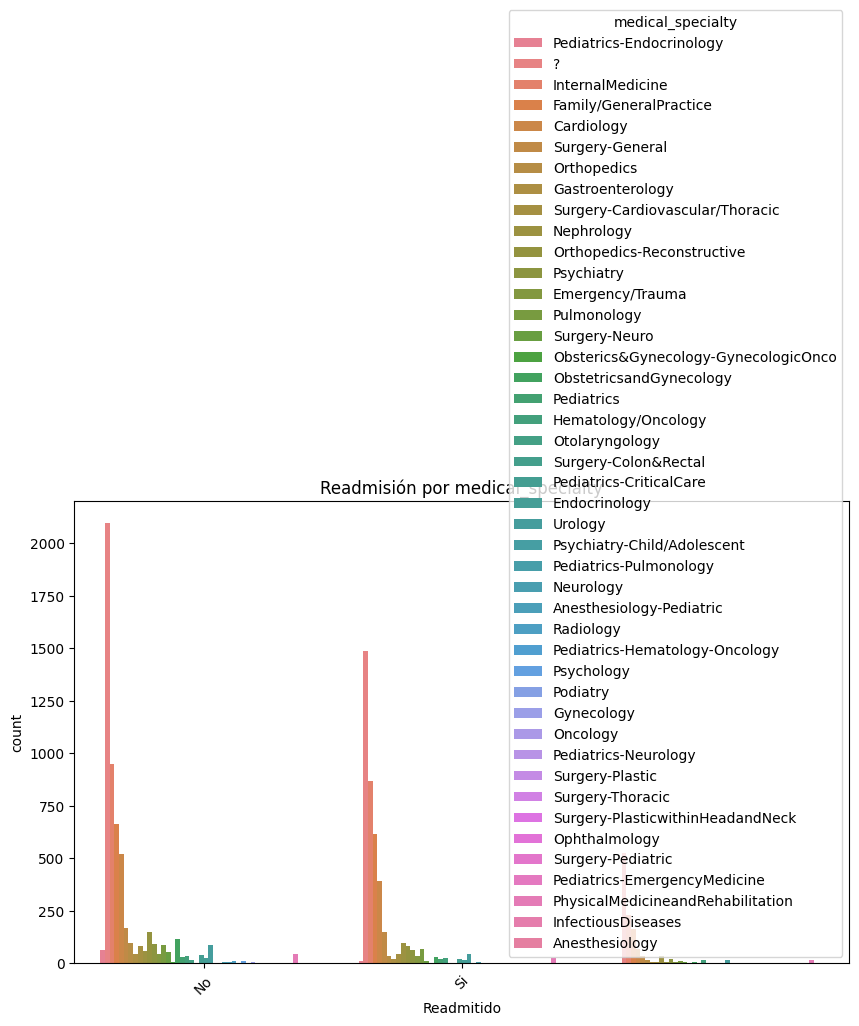

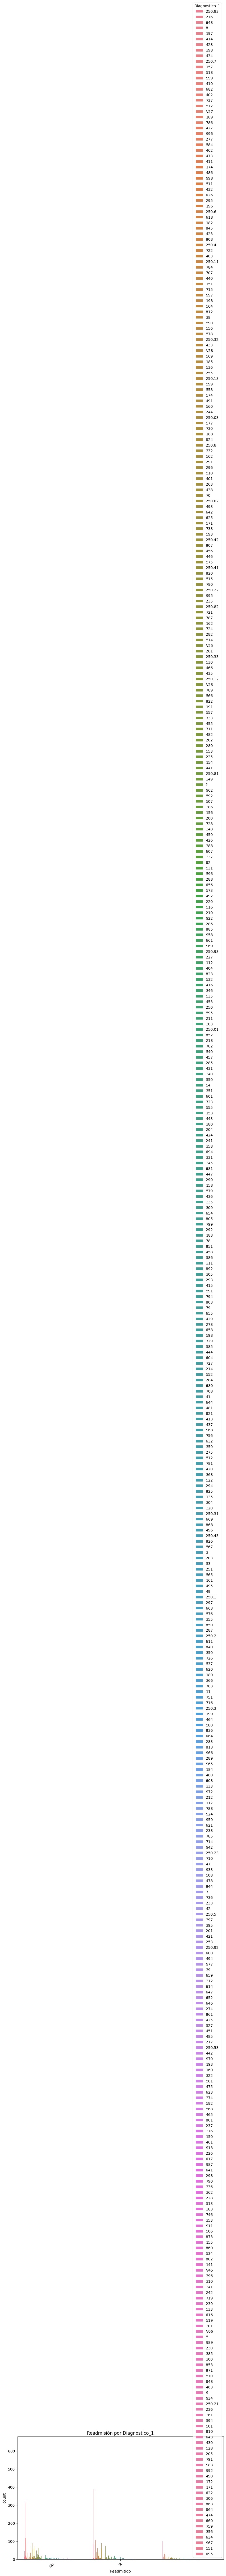

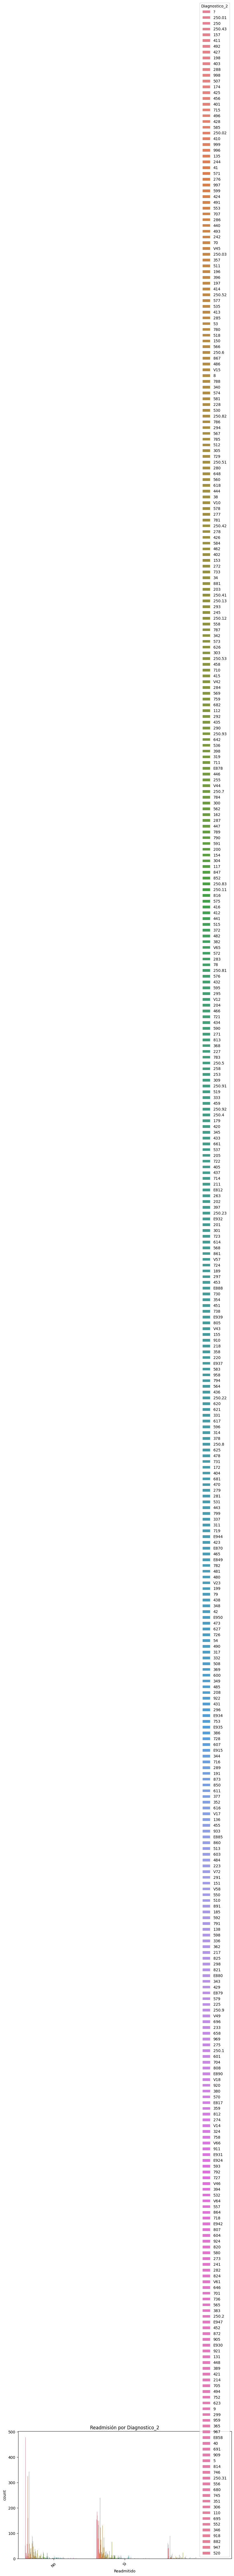

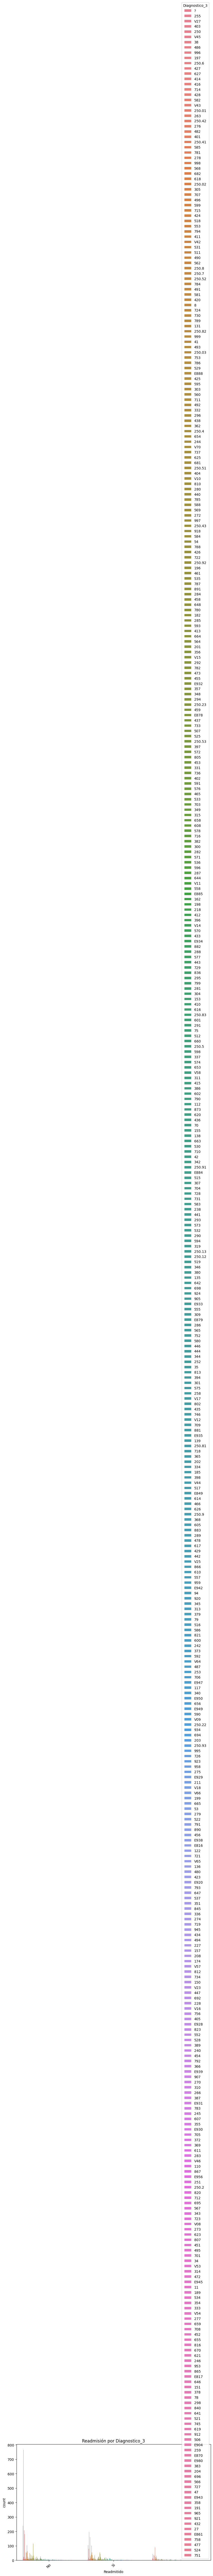

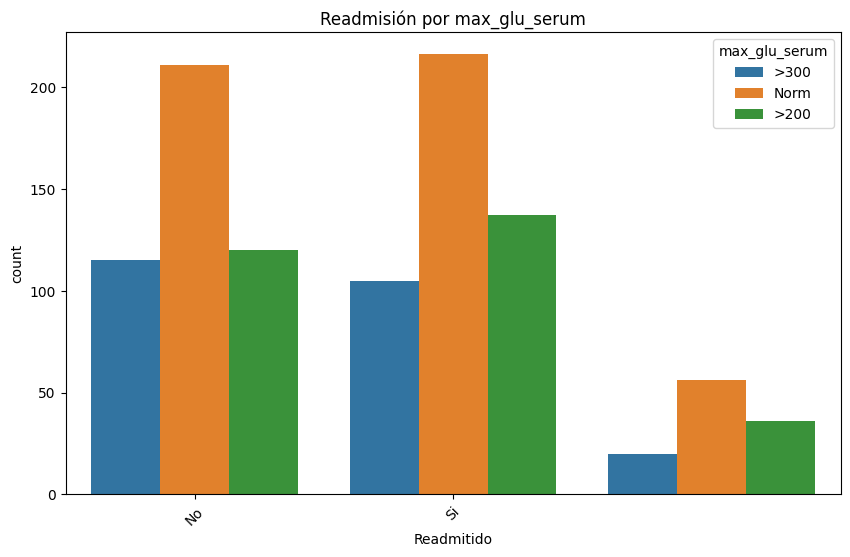

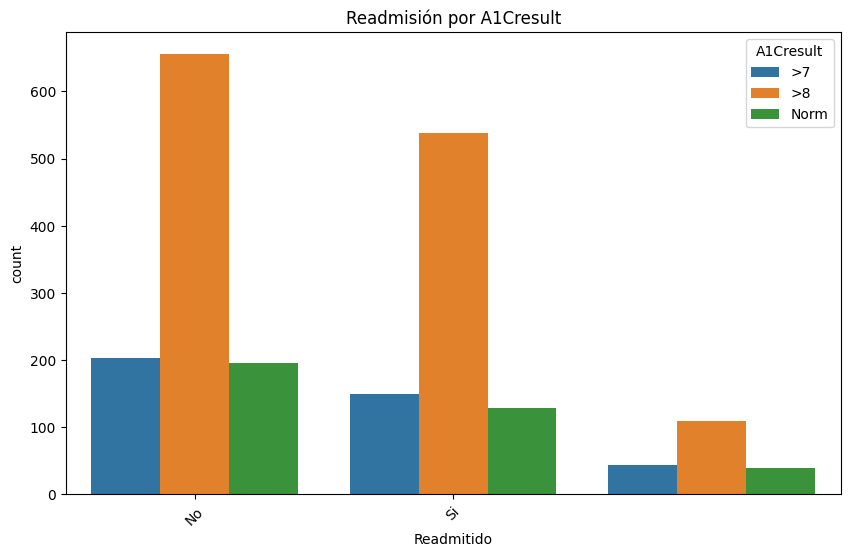

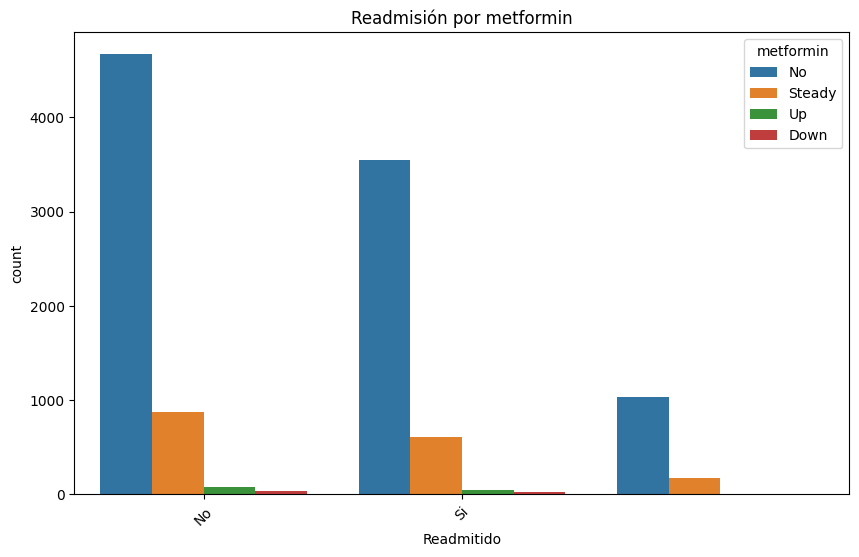

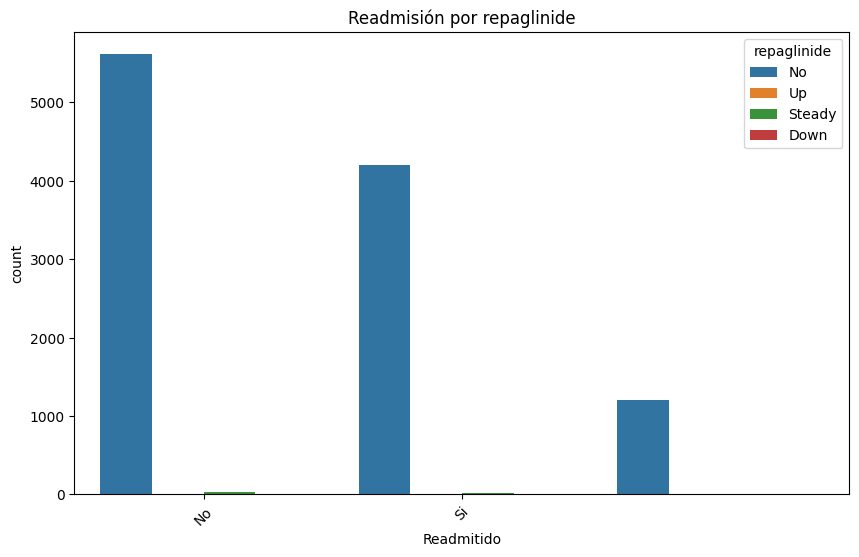

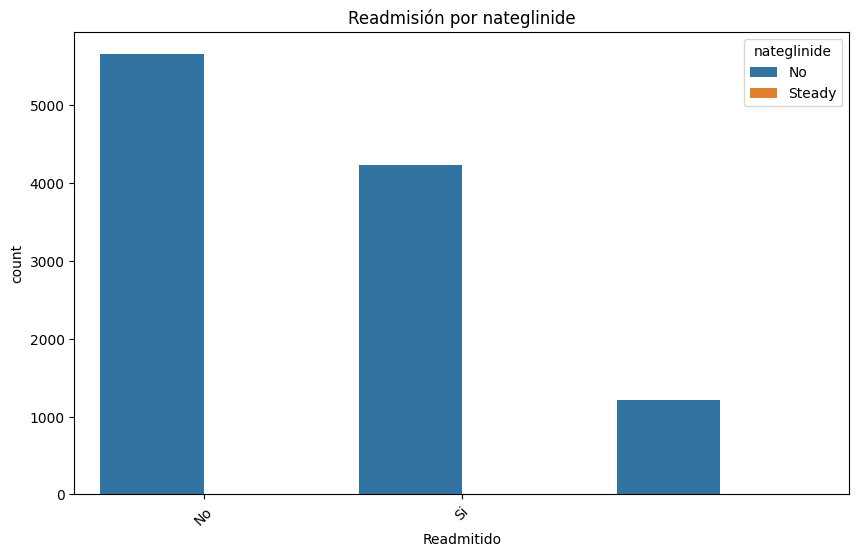

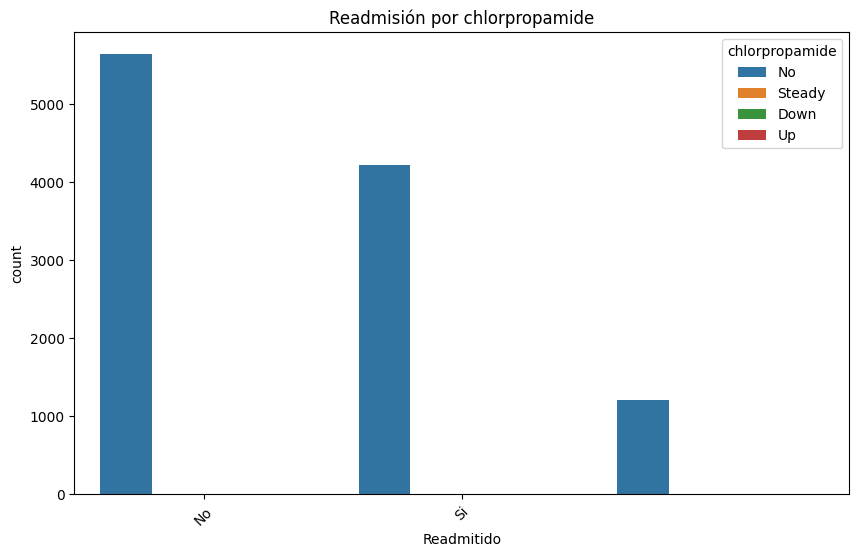

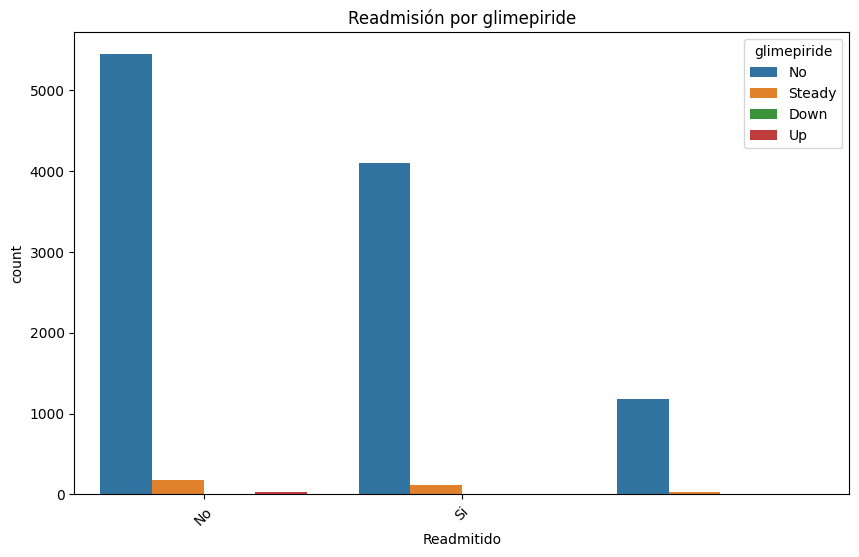

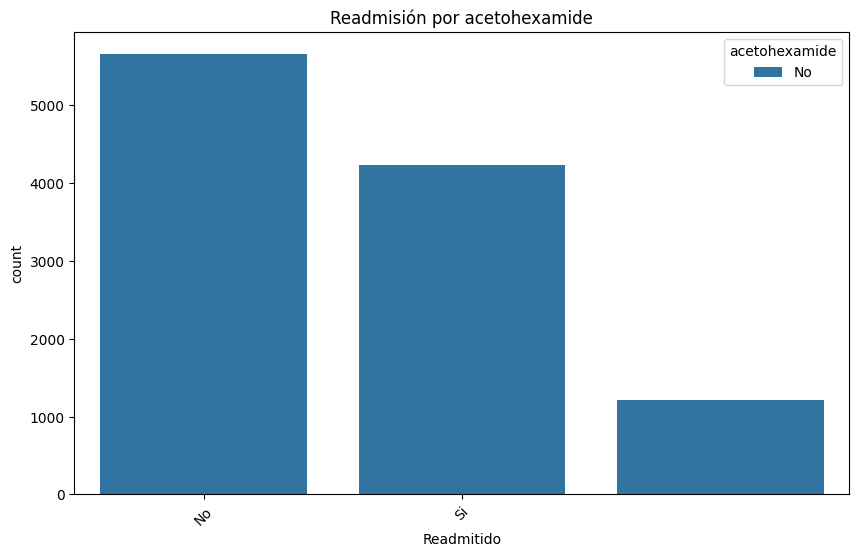

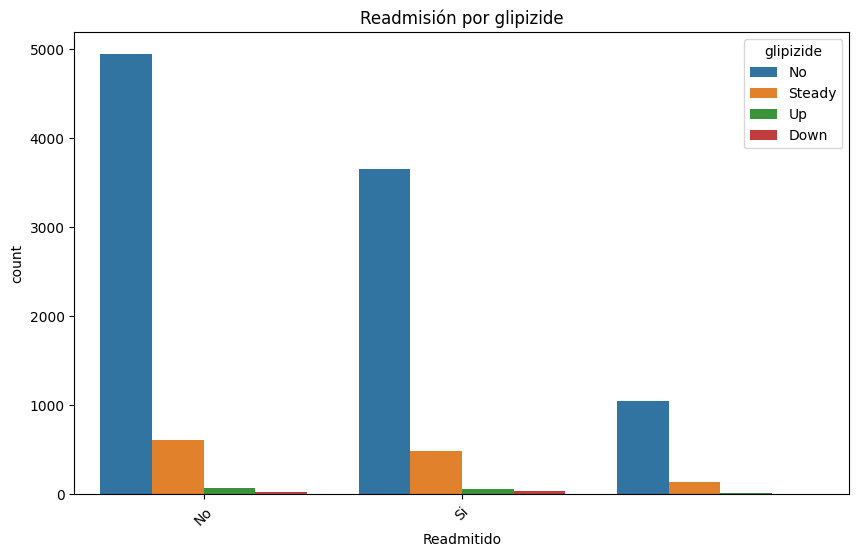

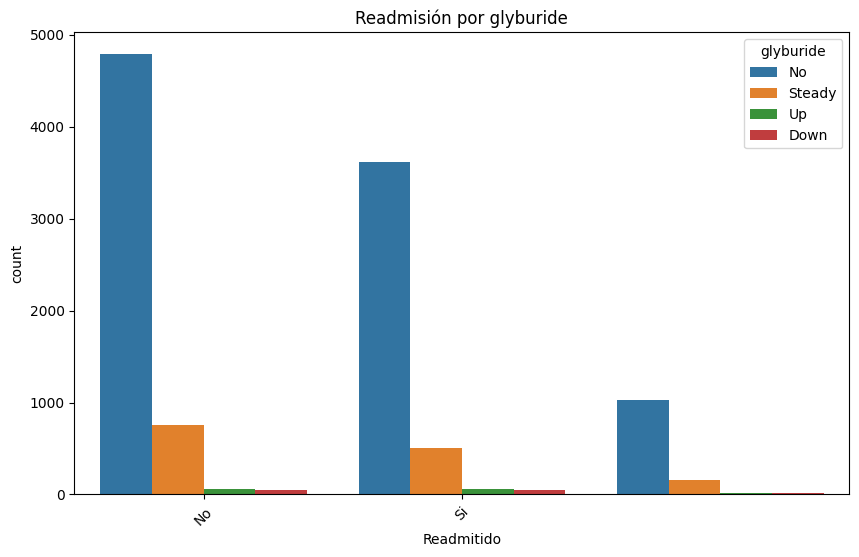

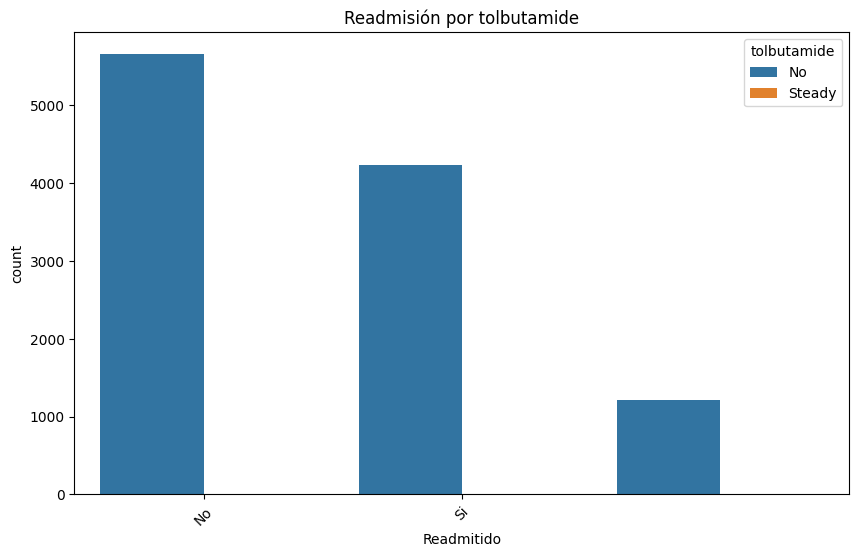

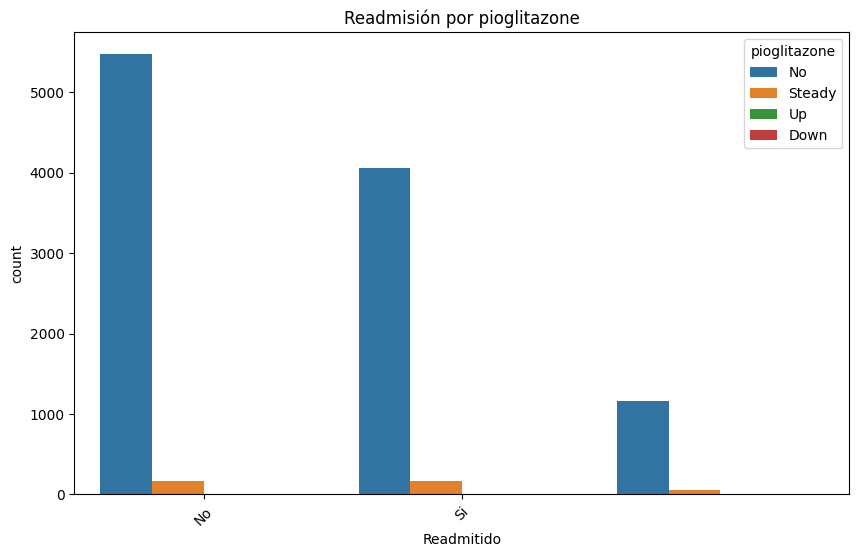

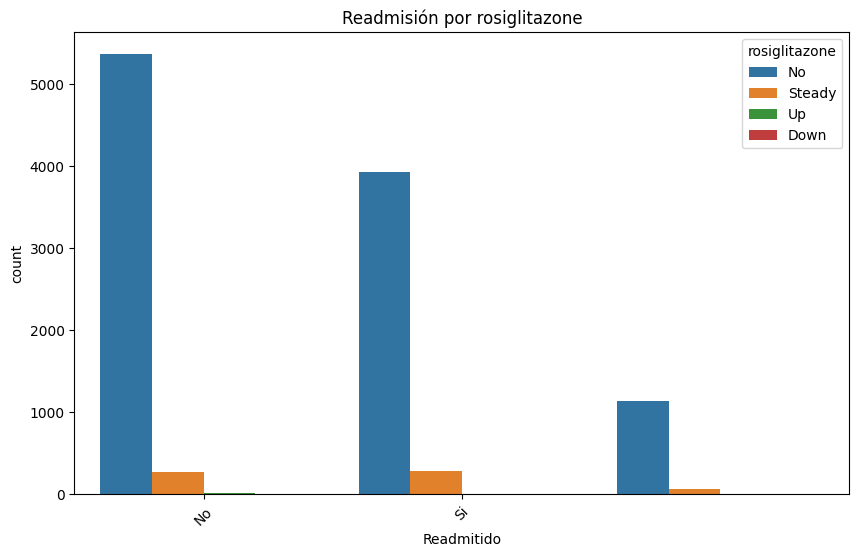

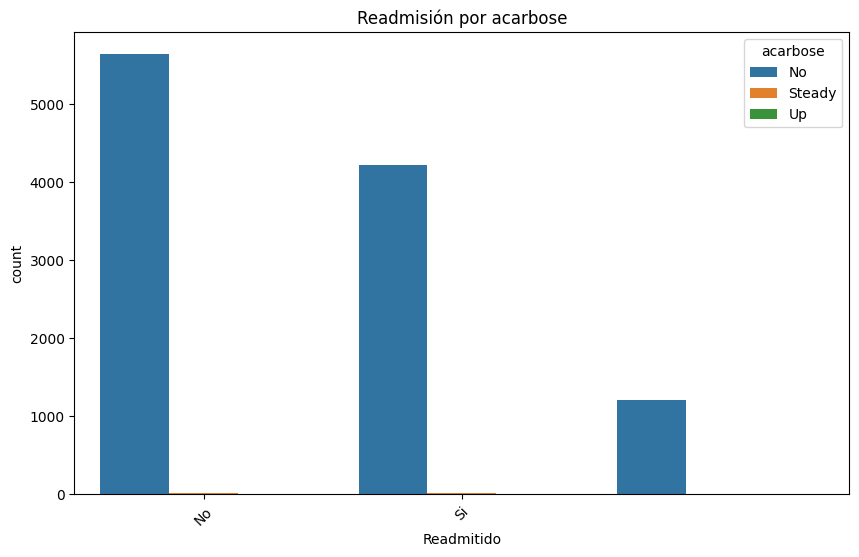

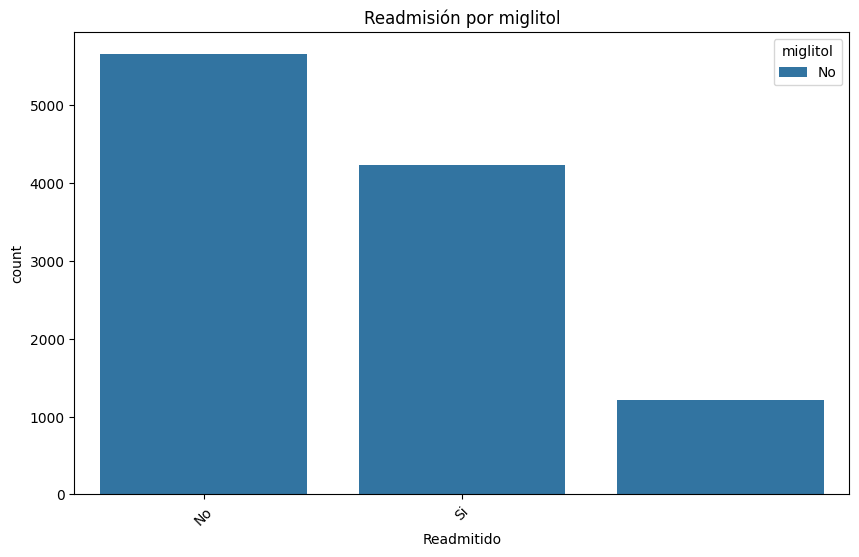

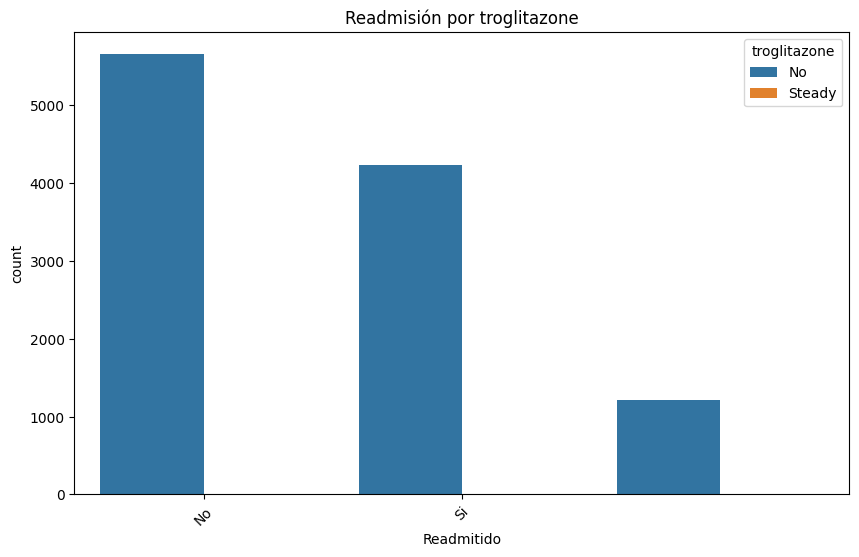

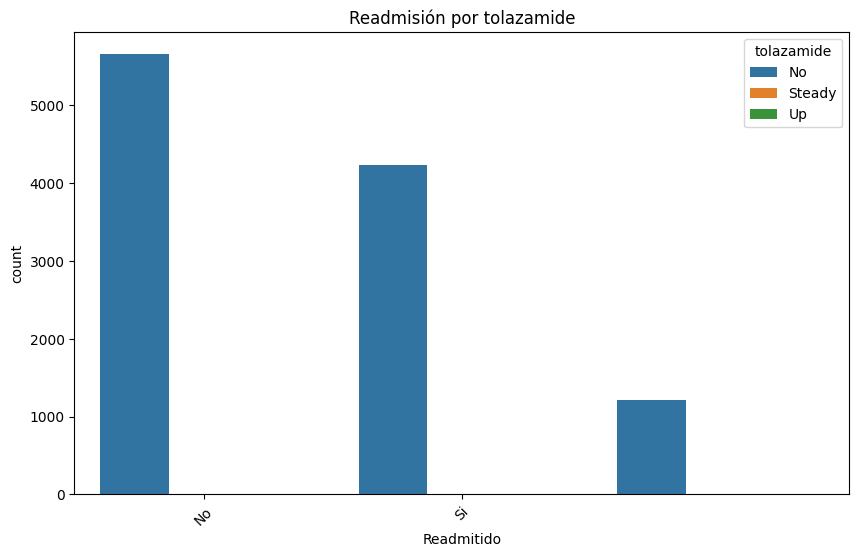

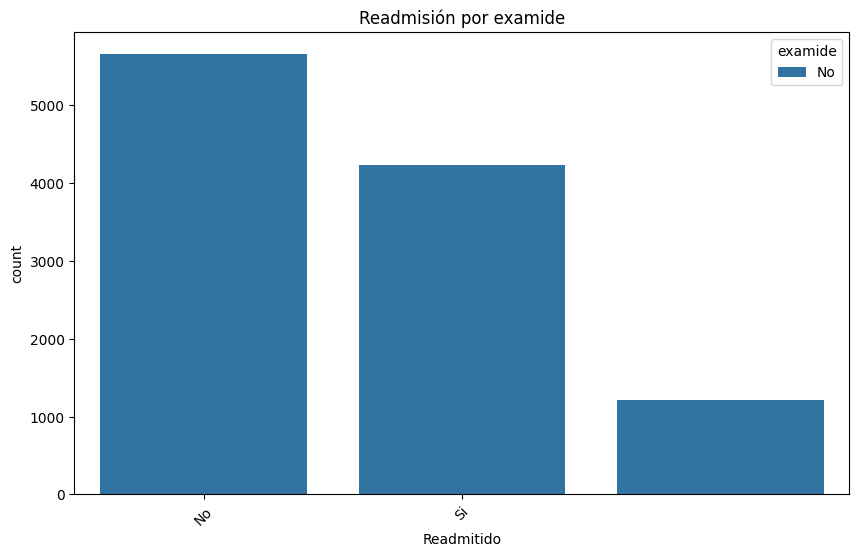

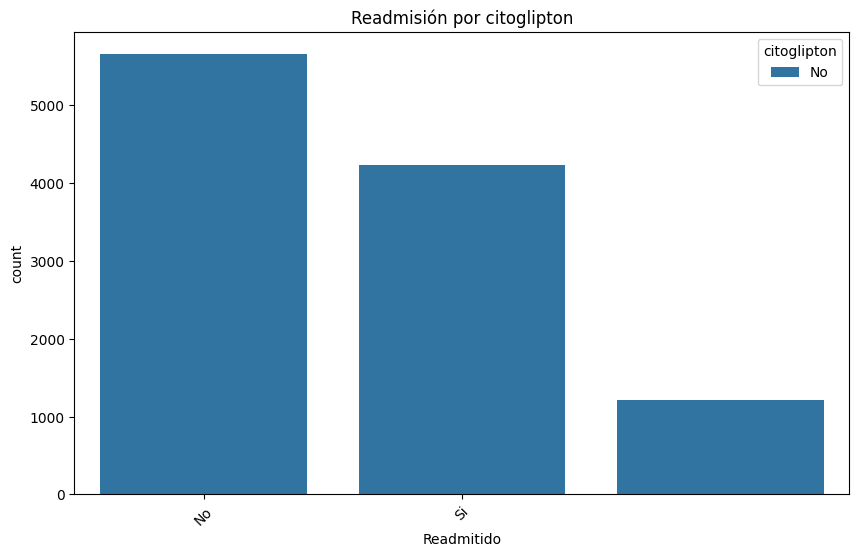

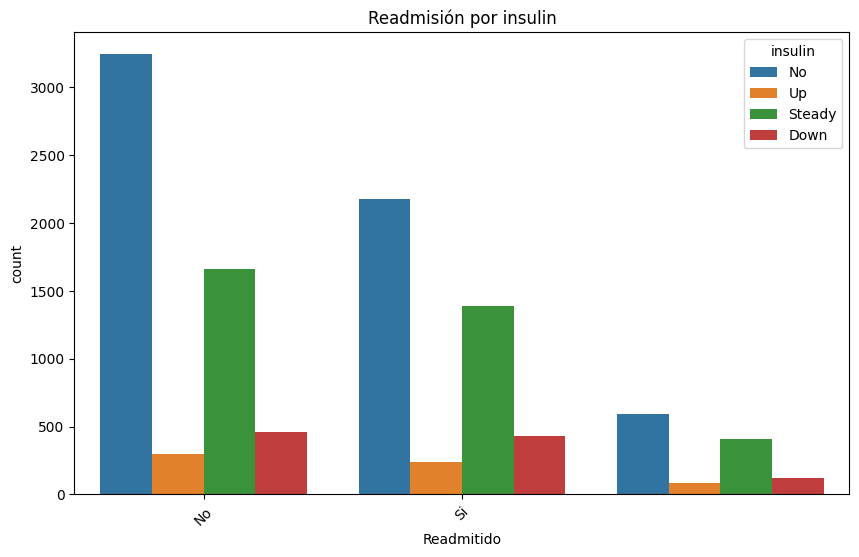

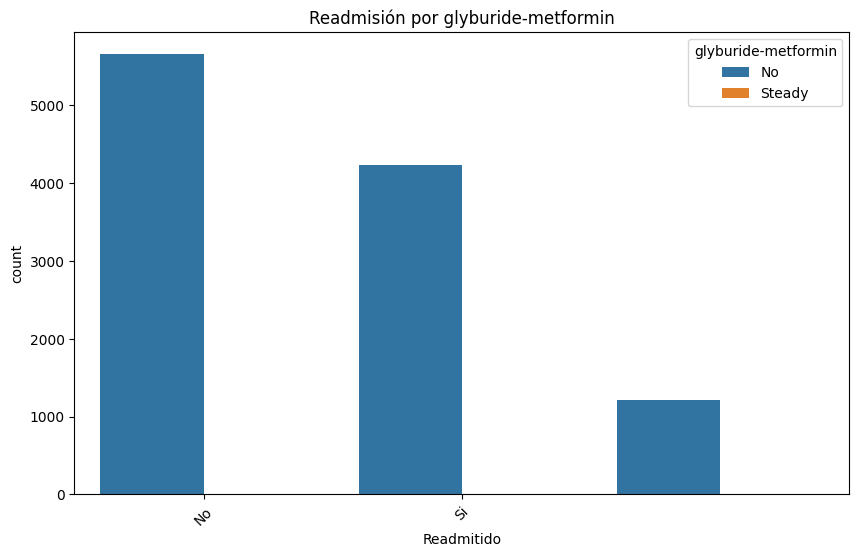

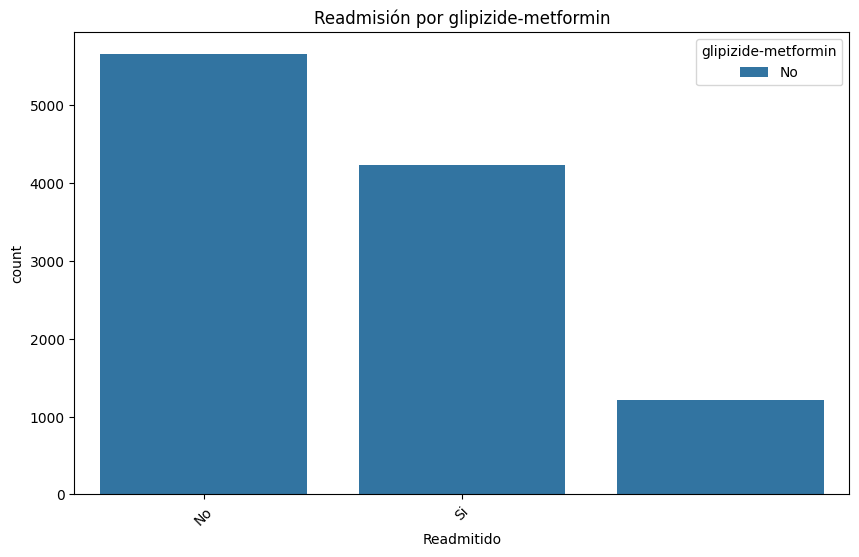

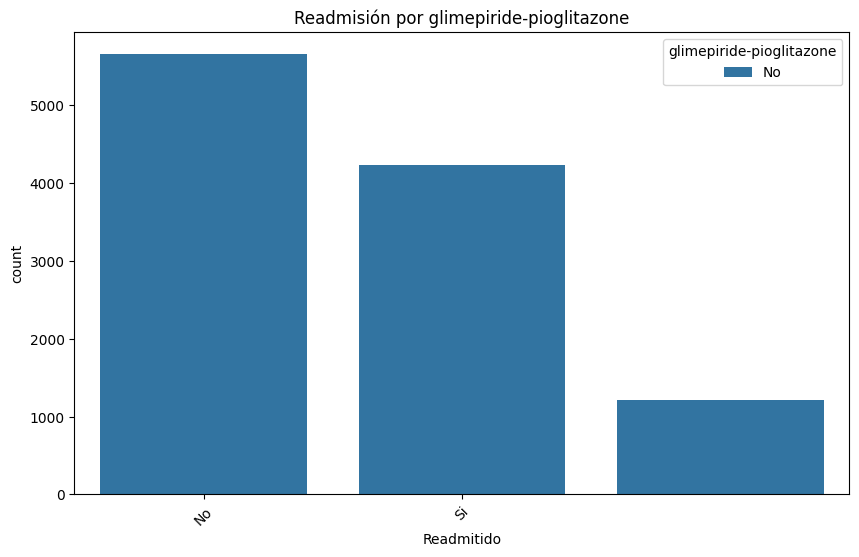

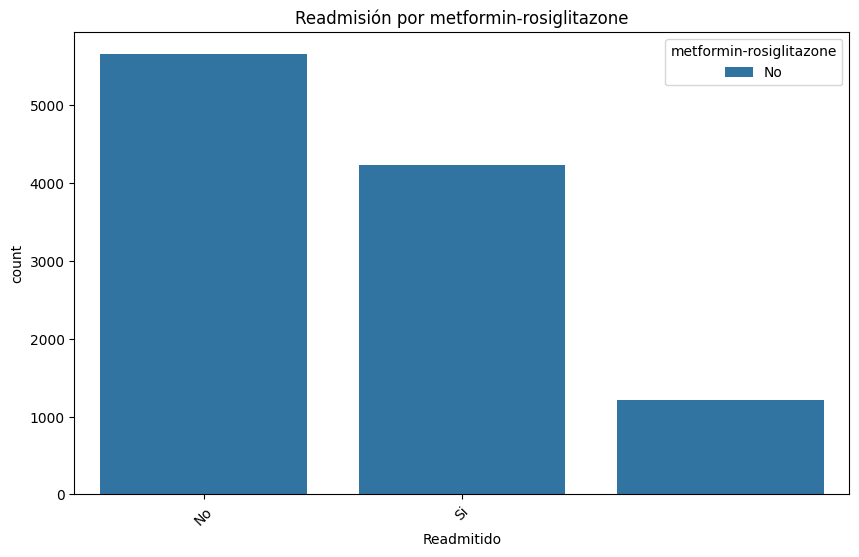

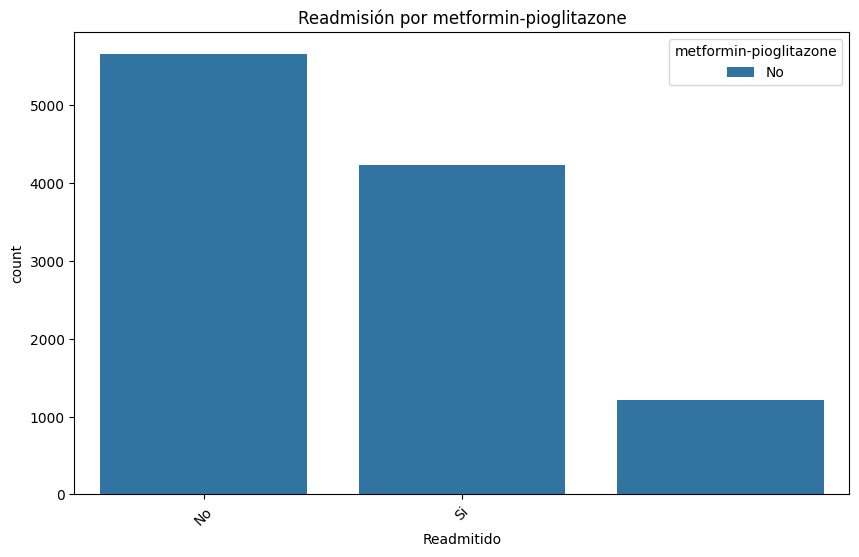

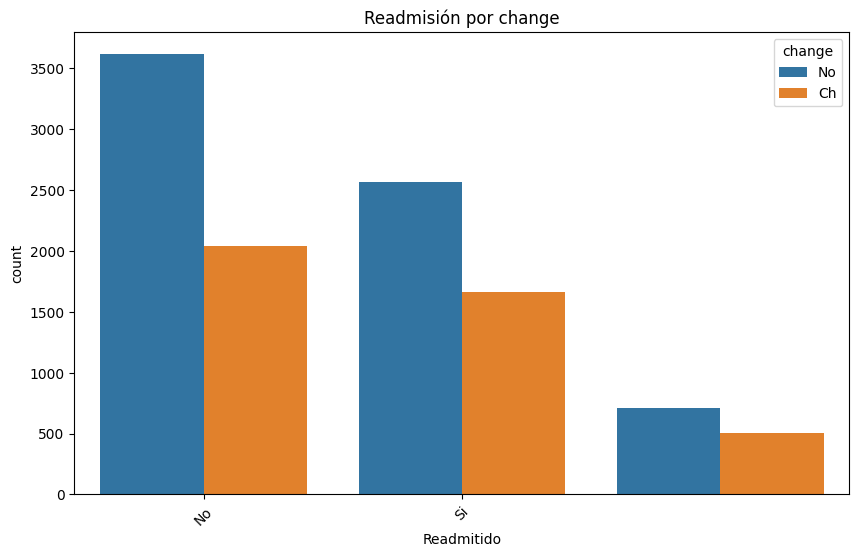

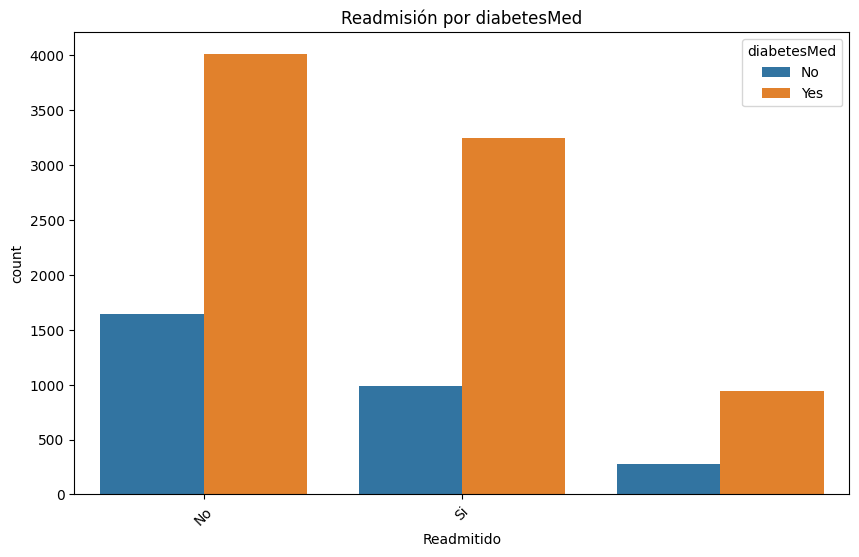

In [14]:
# Podrias graficar nuevamente las variables con los nuevos nombres? Podrias ademas indicar que 1 significa que el paciente fue readmitido y 0 que no?
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Readmitido', y=col, data=df)
    plt.xticks([0, 1], ['No', 'Si'])
    plt.title(f'{col} por Readmisión')
    plt.show()
# Visualización de la relación entre variables categóricas y la variable objetivo
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Readmitido':
        plt.figure(figsize=(10, 6))
        sns.countplot(x='Readmitido', hue=col, data=df)
        plt.title(f'Readmisión por {col}')
        plt.xticks(rotation=45)
        plt.xticks([0, 1], ['No', 'Si'])
        plt.show()